# Content :
* [Introduction](#Introduction)
* [Preprocessing](#Preprocessing)
    * [Finding point estimate measure from confidence interval](#Finding-point-estimate-measure-from-confidence-interval)
* [Analyzing obesity percentages across regions](#Analyzing-obesity-percentages-across-regions)
    * [Point Estimate to interval conparision for Both Sexes](#Point-Estimate-to-interval-conparision-for-Both-Sexes)
        * [Facet regions for Both sexes](#Facet-regions-for-Both-sexes)
    * [Confidence Interval upper bound to lower bound comparision for Both sexes](#Confidence-Interval-upper-bound-to-lower-bound-comparision-for-Both-sexes)
    * [Point Estimate to interval Comparison by Sex](#Point-Estimate-to-interval-Comparison-by-Sex)
    * [Region mean obesity rates](#Region-mean-obesity-rates)
    * [Region mean obesity rates by Sex](#Region-mean-obesity-rates-by-Sex)
    

# Introduction

Before diving into the data, we need to understand a few small things about point estimates and confidence intervals 

It is not possible to calculate  BMI ( or any other metric of interest ) at a huge level, like for an entire nation. Hence the easier way of doing so, is to calculate the metric of interest for a big sample (which is called point estimate ) and then calculate confidence intervals for that point estimate 


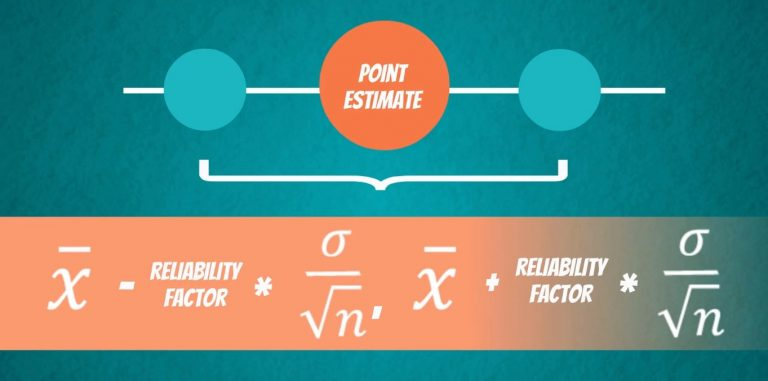

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Preprocessing 

In [ ]:
data=pd.read_csv('/kaggle/input/obesity-among-adults-by-country-19752016/obesity-cleaned.csv')
c_to_c=pd.read_csv('/kaggle/input/country-mapping-iso-continent-region/continents2.csv')
data=data[~(data['Obesity (%)']=='No data')]
data=data.replace('Bolivia (Plurinational State of)','Bolivia').\
replace("Democratic Republic of the Congo",'Congo').\
replace("Guinea-Bissau",'Guinea Bissau').\
replace("Iran (Islamic Republic of)	",'Iran').\
replace("Republic of Korea",'South Korea').\
replace("Republic of Moldova",'Moldova').\
replace("Republic of North Macedonia",'Macedonia').\
replace("Russian Federation",'Russia').\
replace("United Kingdom of Great Britain and Northern Ireland",'United Kingdom').\
replace("United States of America",'United States')
data=data[~(data.Country.isin(['Bosnia and Herzegovina', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Iran (Islamic Republic of)', "Lao People's Democratic Republic",
       'Sudan (former)', 'Syrian Arab Republic',
       'United Republic of Tanzania',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam']))]
data=data.merge(c_to_c[['region','name']].rename(columns={'name':'Country'}),on=['Country'],how='left')

## Finding point estimate measure from confidence interval

We can in turn easily calculate the measure of point estimate from either of the confidence interval bounds as <br/><br/>
$$ Interval = \frac{upper\ bound\ of\ confidence\ interval\ -\ lower\ bound\ of\ confidence\ interval}{2}$$

In [ ]:
data['Obesity_point_estimate']=np.round(data['Obesity (%)'].map(lambda x:str(x).split('[')[0]).astype('float'),2)
data['Obesity_lower_ci']=np.round(data['Obesity (%)'].map(lambda x:str(x).split(' ')[1].replace('[','').replace(']','').split('-')[0]).astype('float'),2)
data['Obesity_upper_ci']=np.round(data['Obesity (%)'].map(lambda x:str(x).split(' ')[1].replace('[','').replace(']','').split('-')[1]).astype('float'),2)
data['Obesity_ci_intervel']=np.round((data['Obesity_upper_ci']-data['Obesity_lower_ci'])/2.0,2)

# Analyzing obesity percentages across regions

## Point Estimate to interval conparision for Both Sexes

In [ ]:
import plotly.express as px
px.scatter(data[data.Sex=='Both sexes'],x='Obesity_ci_intervel',y='Obesity_point_estimate',size='Obesity_ci_intervel',
          animation_frame='Year',animation_group='Country',hover_data={"Obesity_point_estimate":True,"Obesity_ci_intervel":True,'Year':False},
          color='region',hover_name='Country', range_y=[0,data[data.Sex=='Both sexes'].Obesity_point_estimate.max()],
           range_x=[0,data[data.Sex=='Both sexes'].Obesity_ci_intervel.max()])

### Facet regions for Both sexes

In [ ]:
fig=px.scatter(data[data.Sex!='Both sexes'],x='Obesity_ci_intervel',y='Obesity_point_estimate',
          animation_frame='Year',animation_group='Country',hover_data={"Obesity_point_estimate":True,"Obesity_ci_intervel":True,'Year':False},
          color='region',hover_name='Country',facet_col='region', range_y=[0,data.Obesity_point_estimate.max()])
fig.update_layout(
    yaxis_title="Obesity_point_estimate<br>")

## Confidence Interval upper bound to lower bound comparision for Both sexes

In [ ]:
px.scatter(data[data.Sex=='Both sexes'],x='Obesity_upper_ci',y='Obesity_lower_ci',size='Obesity_point_estimate',
          animation_frame='Year',animation_group='Country',hover_data={"Obesity_point_estimate":True,"Obesity_ci_intervel":True,'Year':False},
          color='region',hover_name='Country', range_y=[0,data.Obesity_lower_ci.max()+10],
           range_x=[0,data[data.Sex=='Both sexes'].Obesity_upper_ci.max()+10])

## Point Estimate to interval Comparison by Sex

In [ ]:
px.scatter(data[data.Sex!='Both sexes'],x='Obesity_ci_intervel',y='Obesity_point_estimate',size='Obesity_ci_intervel',
          animation_frame='Year',animation_group='Country',hover_data={"Obesity_point_estimate":True,"Obesity_ci_intervel":True,'Year':False},
          color='region',hover_name='Country', facet_col='Sex',range_y=[0,data.Obesity_point_estimate.max()],
           range_x=[0,data[data.Sex!='Both sexes'].Obesity_ci_intervel.max()])

## Region mean obesity rates

In [ ]:
temp=data[data.Sex=='Both sexes'].groupby(['region','Year']).agg({'Obesity_point_estimate':np.mean,'Obesity_ci_intervel':np.mean}).reset_index()
px.bar(temp,x='region',y='Obesity_point_estimate',animation_frame='Year',color='region',range_y=[0,temp.Obesity_point_estimate.max()+10])

## Region mean obesity rates by Sex

In [ ]:
temp=data[data.Sex!='Both sexes'].groupby(['region','Year','Sex']).agg({'Obesity_point_estimate':np.mean,'Obesity_ci_intervel':np.mean}).reset_index()
px.bar(temp, x="region", y="Obesity_point_estimate", color="Sex", barmode="group",animation_frame='Year',range_y=[0,temp.Obesity_point_estimate.max()+10])